In [ ]:
# installations
!pip install --upgrade pip

!python --version
!pip3 install jedi==0.16

!pip3 uninstall cvxpy -y > /dev/null
!pip3 install setuptools==65.5.0 pip==22.2 > /dev/null
# hack for gym==0.21.0 https://github.com/openai/gym/issues/3176
!pip3 install torch==1.13.1 torchvision==0.14.1 diffusers==0.11.1 \
scikit-image==0.19.3 scikit-video==1.1.11 zarr==2.12.0 numcodecs==0.10.2 \
pygame==2.1.2 pymunk==6.2.1 gym==0.21.0 shapely==1.8.4 dnn \
&> /dev/null # mute output
!pip install --upgrade "jax[cuda12_pip]"==0.4.23 -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html &> /dev/null
# This will take a while, and do not worry if you get some warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

import os

In [ ]:
#change to desired path to the DiffusionModels folder
os.chdir("./drive/MyDrive/homework3/DiffusionModels")
%pwd

In [ ]:
from tests import TestCases
unit_tester = TestCases()

# Homework 3: Part 2 - Diffusion Models [21 points]

Denoising Diffusion Probabilistic Models (DDPM) - https://arxiv.org/abs/2006.11239/ \
Classifier Free Guidance (CFG) - https://arxiv.org/abs/2207.12598

In this part of the assignment you will be implementing a diffusion model and applying it in an image generation task.  Denoising Diffusion Probabilistic Models (DDPMs), also known as Diffusion Models, are state of the art generative models that train a network to itteratively denoise random gaussian noise.  If you have not done so already, please read through the DDPM paper linked above in order to get an understanding of the math behind DDPMs.  The code for this part of the assignment is not particularly difficult, but you will have a difficult time if you do not understand the theory behind diffusion models.  You will also be implementing classifier free guidance (CFG).  While the CFG paper does not have to be read as thoroughly as the DDPM paper, it is definitely a useful read if you are not familiar with CFG.

Note: (you "may" have to revisit this note several times)
* Algorithm1 and Algorithm2 in the paper use 1 indexing for timesteps. We are using 0 indexing.
* In the paper they talk about using either $\beta$ or $\widetilde{\beta}$ for variance. We will always use $\beta$, even for the thresholding section
* For thresholding, when t = 0, just set $\bar{\alpha}_{t-1} = 1$
* Use noise_pred_net(sample = x, timestep = t, global_cond = c) to generate an output from the noise prediction network (alternatively you can just call noise_pred_net(x, t, c))
* For CFG, please use zeros_like

#### Creating the DDPM

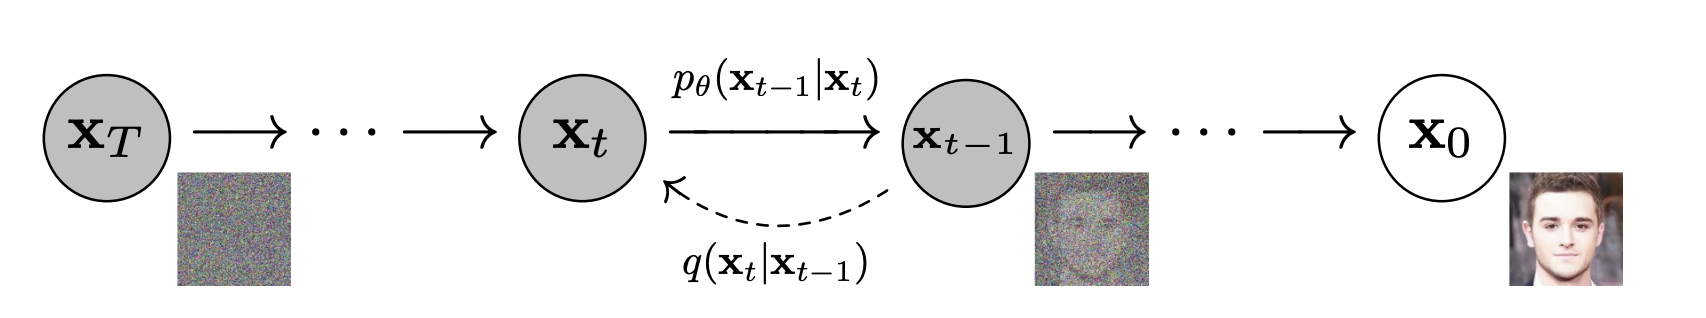

For the sake of this assignment, we are breaking the Diffusion Model into two parts.  A noise scheduler and a noise prediction net.  The noise scheduler handles the noise addition during the forward process and the noise removal during the reverse process.  The noise prediction net is a neural network that predicts the amount of noise that should be removed at each denoising step.  Transformers, like the one you implemented in the last assignment, can be used as this noise prediction network.  For this assignment we are using a U-Net as opposed to a transformer, but you will not be implementing this model, just training it.

### IMPORTANT NOTE FOR IMPLEMENTATION!

You will be generating random numbers in various sections of this project.  To keep the outputs deterministic for unit test and auto grader purposes, you <u>must</u> use our prebuilt randomizer function.  This randomizer is defined in ```DiffusionModels/randomizer.py```.  Please take a look at that function before you start coding.  The function that we define is sufficient for generating any random numbers that you will need for this project.

### IMPORTANT NOTE 2
The equations in the DDPM paper describe an unconditional model, you will be implementing a conditional model.  This does not significantly change the equations, you just need to pass in the conditioning term along with $x$ and $t$.  Make sure to watch the first lecture on generative models if you are running into confusion about this or other aspects of Diffusion Models.

## Part 2.1 - Noise Scheduler [6 points]
**2.1.1** - Forward Process (Adding Noise) [3 points] [.5 writeup points]

During the forward process, we take an input and gradually add Gaussian noise to the data according to a variance schedule.  This is described in section 2, background, of the DDPM paper.  You must read that section to complete this part of the assignment.


**TODO:** Complete initialization function in ```DiffusionModels/noise_scheduler.py```

**TODO:** Implement ``add_noise`` function in ``part2-DiffusionModel/noise_scheduler.py``
\
\
_Hint:_ Pay attention to equation 4
\
\
<u>Question:</u> what does $q(x_t|x_o)$ represent for a diffusion model? (read the paper)

<u>Answer:</u>  

In [ ]:
# test initialization
unit_tester.test_noise_scheduler_init()
# test add noise
unit_tester.test_add_noise()


**2.1.2** - Reverse Process (Removing Noise) [2.5 point]

When taking a step during the backwards process, we have access to a partially noised sample $x_t$, the denoising timestep $t$, and our model's noise prediction.  We remove the predicted noise to get a slightly less noisy sample $x_{t-1}$.  The completely uncorrupted sample is recovered at $x_0$.  This process is described in detail in section 3 of the DDPM paper, please read this section before completing this part of the assignment.

*TODO:* Implement ``denoise_step`` function in ``DiffusionModels/noise_scheduler.py`` (do not implement the thresholding part yet)
\
\
_Hint:_ Pay attention to algorithm 2 - Sampling

In [ ]:
# test denoise step
unit_tester.test_denoise_step()


## Part 2.2 - Constructing the Diffusion Model [7 Points]

We have provided you with a noise prediction network, and you have just written a noise scheduler.  With these two parts you are able to put together a completed diffusion model.

*2.2.1* Compute Loss for Training [2 points] [.5 writeup points]
\
\
For this part of the assignment, you will be implementing the ``compute_loss_on_batch`` function of the diffusion model.  We have implemented the rest of the training logic for you. Keep in mind, the only part of the diffusion model that needs to be trained is the noise prediction network.  Your loss function should capture how well the noise_pred_net estimates the added noise.  We expect you to implement the simplified variant of the variational lower bound as described in section 3.4 of the DDPM paper.

*TODO:* Implement loss computation section of ``compute_loss_on_batch`` function in ``DiffusionModels/diffusion_model.py``
\
\
_Hint:_ Use your noise scheduler, refer to equation 14 and Algorithm 1 - Training
\
_Hint:_ For each item in the batch, you should be selecting a random timestep $t$ to compute the loss
\
\
<u>Question:</u> What is $\epsilon_\theta(\sqrt{\bar{\alpha_t}}x_0 + \sqrt{1 - \bar{\alpha_t}}\epsilon, t)$ ?

<u> Answer: </u>  

In [ ]:
# test loss computation
unit_tester.test_compute_loss_on_batch()

2.2.2 Classifier Free Guidance [1 Point]

We want our diffusion model to make use of classifier free guidance.  If you are not familiar with classifier free guidance, please take a look at the CFG paper now.  Classifier free guidance allows us to variably combine noise predictions from a conditional and an unconditional noise prediction network at inference time.  This has the effect of enhancing class specific features and is critical for high quality image generation.  In practice, we train the unconditional noise prediction net at the same time as the conditional noise prediction net.  Section 3.2 of the CFG paper describes this process.  

<u>We expect you to use 0s as the null tokens. </u>
\
\
*TODO:* Implement classifier free guidance section of ``compute_loss_on_batch`` function in ``DiffusionModels/diffusion_model.py``
\
\
_Hint:_ This should only be a few lines, use self.p_uncond

In [ ]:
# test classifier free guidance training
unit_tester.test_compute_loss_with_cfg()


2.2.3 Sample Generation (with classifier free guidance) [3.5 points]

Before we can actually use our diffusion model, we need to write the code for generating a sample.  To generate an output, we draw a sample $x_T$ from random gaussian noise.  We then itteratively denoise the random output for T denoising timesteps until we get our uncorrupted output $x_0$.  You will be implementing sampling with classifier-free guidance.  Do not worry about replicating algorithm 2 of the CFG paper, we only expect you to calculate the updated noise prediction from equation 6 of the CFG paper:$$ \bar{\epsilon_\theta}(x_t, t, c) = (1 + w) * \epsilon_\theta(x_t, t, c) - w * \epsilon_\theta(x_t, t, \empty) $$

where $\epsilon_\theta$ is the predicted noise from your noise prediction network and $w$ is the guidance weight

*TODO:* Implement ``generate_sample`` function in ``DiffusionModels/diffusion_model.py``
\
\
_Hint:_ Use your noise scheduler and refer to Algorithm 2 - Sampling of the DDPM paper \
_Hint:_ Dont forget that this is a conditional model and to include classifier free guidance

In [ ]:
# test generate sample
unit_tester.test_generate_sample()


## Part 2.3 - Diffusion Model Applications (Computer Vision) [8 points]

Diffusion models are mostly known in popular culture because of image generation tools such as Dall-e and Midjourney.  These models are able to take in text based prompts and output extremely realistic photos.  For the sake of this assignment we will not be implementing anything that is nearly as visually impressive, but we hope to shed some insight on a few critical aspects to state of the art diffusion models.  Namely classifier free guidance and thresholding.  You will be working with a subset of the CIFAR-10 dataset.  The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class.  We will be working with the first three classes of this dataset - airplanes, automobiles, and birds.

<!-- <img src="assets/CIFAR.png" alt="CIFAR" style="width:500px" /> -->

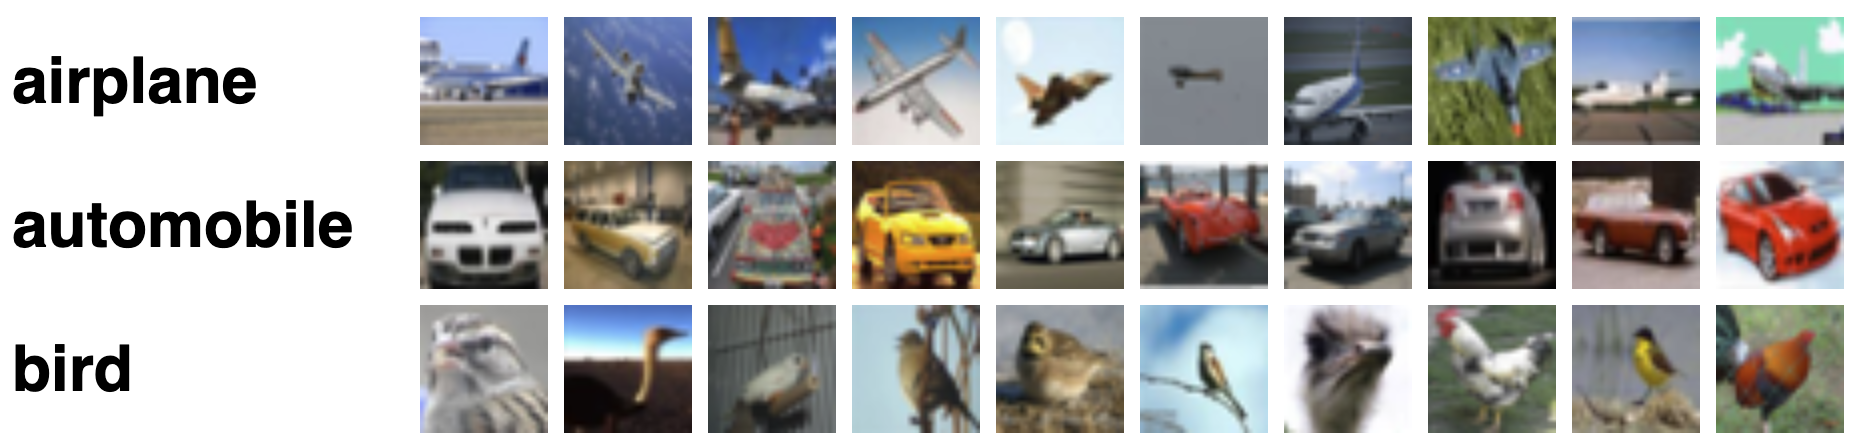

In [ ]:
# Imports and global function definitions
from computer_vision.image_gen import ImageGenerator
from matplotlib import pyplot as plt

def plot_image(output):
    B, H, W, C = output.shape
    # batch size divided by number of classes
    num_cols = B // 3
    assert B % 3 == 0
    fig, axes = plt.subplots(3, num_cols, figsize=(12, 8))
    # Loop through the rows
    for i in range(3):
        # Loop through the columns
        for j in range(B // 3):
            image = output[i * (B // 3) + j]
            if num_cols == 1:
                axes[i].imshow(image)
                axes[i].axis('off')
            else:
                axes[i, j].imshow(image)
                axes[i, j].axis('off')

    # label the first row "airplane", the second row "automobile", and the third row "bird"
    axes[0, 0].set_title('airplane')
    axes[1, 0].set_title('automobile')
    axes[2, 0].set_title('bird')

    plt.show()

In [ ]:
# Run this cell to download the dataset, only needs to be done once even if you restart the notebook
%cd computer_vision
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz
%cd ..

*2.3.1* Initialization and Data Augmentation [2 writeup points]

In parts 2.1 and 2.2 you implemented diffusion model training and sample generation, so the majority of the work for generating images is done!  The computer_vision/image_gen.py file handles the rest of the logic for image generation.  Your first task is to complete the initialization function, this is only a few lines of code.
\
\
*TODO:* Complete initialization function in ``DiffusionModels/computer_vision/image_gen.py``

In [ ]:
generator = ImageGenerator()

After initializing the image generator, take a look through the rest of the file to understand how the data is loaded and how the images are generated.  Your next task is to perform data augmentation on the CIFAR dataset (for the sake of training time we do not require you to actually add augmenations and increase the size of your dataset, but go through this exersize with us anyway).  This is a common technique in the computer vision world as it allows us to increase the size of our dataset and train the model to be invariant to certain perturbations. You may have done this before when training a classification model, but now we are training a generator.  The types of augmentations that we want our generator to be invariant to are not necessariliy the same as for a classifier.

<u> Question: </u> _Why might we want a classifier to be invariant to different augmentations then a generator?  Name 2 augmentations that we might perform on a classification dataset that we don't want to perform on a dataset for a generative model.  Name 2 augmentations that you want to perform on a dataset for a generative model (its okay if you want also want to do the same augmentations on a classification dataset)._

<u> Your Answer Here: </u>  

*OPTIONAL:* Implement two augmentations in the ``load_dataset`` function of ``DiffusionModels/computer_vision/image_gen.py``,  (these should be the augmentations you described above). Increasing the dataset size will slow down your training, so we do not require you to actually implement these augmentations.  However, we have left room for you to add the code for augmentation if you have the time or compute.  \
*OPTIONAL:* Display an image from the CIFAR dataset and show it after the augmentations (3 images total: original, augmentation 1, augmentation 2)

In [ ]:
# Feel free to add more cells or generate the images separately and display them as a Markdown cell

*2.3.2* Image Generation and Classifier Free Guidance [1 writeup point]

Now it is time to train the model - if this fails to run, go and check over your previous work.
We are implementing a small model, but even still, this will take a while to train!  Please use google colab if you do not have access to a GPU.  The remainder of this assignment will be infeasable for you if you do not have a GPU.  That being said, we understand that you have time constraints and we do not expect you to let this model train for hours (although your results would look much better if you did).

We ask that you budget 30 minutes for the training of this image generation model, you can run it for longer if you prefer though.  Do not stress too much about the specific images generated, we know the outputs will be poor given your limited computation budget.  If your loss isnt decreasing (should get below 0.1 after ~7 epochs of training and below 0.05 by the end of training) or you are generating random noise, then you may have a serious issue.  But if your airplane is a smudge on a blue-ish background, that is a great output.  The goal is for you to learn, we will be paying much more attention to your analysis than your images.  

In [ ]:
generator.load_dataset(dataset_paths=[
    'computer_vision/cifar-10-batches-py/data_batch_1',
    'computer_vision/cifar-10-batches-py/data_batch_2',
    'computer_vision/cifar-10-batches-py/data_batch_3',
    'computer_vision/cifar-10-batches-py/data_batch_4',
    'computer_vision/cifar-10-batches-py/data_batch_5',
    ], batch_size = 64
     )

In [ ]:
# You can just rerun this cell to keep training the model

# Keep the number of epochs at 25 for now (if you need it to be smaller that is okay as well)
# You will have a chance to increase the training time and generate your best images at the end of this section
generator.train_policy(epochs=25)
generator.policy.save_weights('model_pths/image_weights.pth')

# Load the model from the checkpoint
# generator.policy.load_weights('model_pths/image_weights.pth')
# generator.load_dataset(dataset_paths=[
#     'computer_vision/cifar-10-batches-py/data_batch_1',
#     'computer_vision/cifar-10-batches-py/data_batch_2',
#     'computer_vision/cifar-10-batches-py/data_batch_3',
#     'computer_vision/cifar-10-batches-py/data_batch_4',
#     'computer_vision/cifar-10-batches-py/data_batch_5',
#     ], batch_size = 64
#      )

First, you will evaluate the output of unguided image generation.  The generate_images will produce num_samples generations of each class.

In [ ]:
image = generator.generate_images(guidance=0, num_samples=8)
plot_image(image)

<u> Question: </u>  What do you notice about the quality of unguided image generation?  How effectively is the model learning each class? This is very early in the training process, but do you notice any features that the model is learning for each class?

<u> Your Answer Here: </u>  

Now, we will evaluate image generation with different guidance weights.  To do this, we dont actually need to retrain the model at all, this guidance can be done purely at inference time. Great!  Explain why we dont have to retrain for image guidance.

<u> Your Answer Here: </u>  

In [ ]:
image = generator.generate_images(guidance=0.5, num_samples=8)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=1, num_samples=8)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=2, num_samples=8)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=5, num_samples=8)
plot_image(image)

<u> Question :</u>  What do you notice about the generations with classifier free guidance?  What features does the model pick up as being most indicattive of each class?  Does performance degrade as guidance increases? If so, how?

<u> Your Answer Here :</u>

*2.3.3* Thresholding [2 points] + [3 writeup points]

You may have noticed that with high guidance weights, the images tend to oversaturate.  This is because the model is predicting values outside of the range [-1, 1] (our input is normalized to this range before being passed to the model).  To help mitigate this, it is common to threshold sample predictions at each denoising step.  As our denoising step is currently implemented, we can't actually use this technique. This is because we directly estimate $x_{t-1}$.  Why shouldn't we just threshold $x_{t-1}$ to be within [-1, 1]?  Additionally, why is thresholding particularly useful when dealing with large guidance weights?  Will thresholding have an effect even if we don't have a large guidance weight?

<u> Your Answer Here: </u>  

So we need to compute $x_{t-1}$ such that we estimate $x_{0}$ as an intermediate step.  This way we can threshold our estimate of $x_{0}$.  
<u> This is shown in equations (6) and (7) of the DDPM paper.  The equation for computing an estimate of $x_0$ is shown in equation (15).  Make sure to threshold the prediction of $x_0$! </u>

*TODO:* Implement denoising with thresholding in the ``denoise_step`` function in ``DiffusionModels/noise_scheduler.py``

In [ ]:
# test denoise step with thresholding
unit_tester.test_threshold_denoise_step()

Now that you have completed the thresholding, evaluate how this changes image generation with different guidance weights.

In [ ]:
image = generator.generate_images(guidance=0, num_samples=8, threshold=True)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=0.5, num_samples=8, threshold=True)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=1, num_samples=8, threshold=True)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=2, num_samples=8, threshold=True)
plot_image(image)

In [ ]:
image = generator.generate_images(guidance=5, num_samples=8, threshold=True)
plot_image(image)

<u> Question: </u> How do the results after thresholding compare to the results before thresholding?  With thresholding and high guidance weight, which class specific features are most prominant?  Which set of parameters gave you the best output?

<u> Your Answer Here:</u>

*TODO:* Experiment with different training times and guidance weights!  Try and get the best image possible (or show something else interesting).  You need at least two more generations, feel free to do more are welcome though.

In [ ]:
# room for experimentation

#### Collect Submission

Run the following cell to collect ```assignment3_part2_submission.zip```.  You will submit this to HW3 Code - Part 2 on gradescope.  Make sure to also export a PDF of this jupyter notebook and attach that to the end of your theory section.  This PDF must show your answers to all the questions in the document, please leave in all the photos that you generate as well.  You will not be given credit for anything that is not visible to us in this PDF.

In [ ]:
%%bash collect_submission.sh

*Contributers*
- Matthew Bronars (Lead)
- Manav Agrawal
- Mihir Bafna